# Installing the necessary Libraries

In [25]:
#Installing the necessary libraries
import sys
!{sys.executable} -m pip install geocoder
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install html2image

# Importing the necessary Libraries

In [26]:
#Importing the necessary libraries
import geocoder
import folium
import pandas as pd
import plotly.express as px
import os
import json
import math
from typing import List, Dict, Any, Tuple
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Reading the CSV file where the IP address of the camera that spotted the criminal will be stored

In [27]:
ip = pd.read_csv(os.getcwd()+'\ip_address.csv')
ip

IP
0    122.161.50.17
1  103.204.169.206
2  103.217.132.227
3     14.99.158.90

# Getting latitute and longitude value from the IP addresses

In [28]:
#creating an empty dataframe to store latitude and longitude values
loc = pd.DataFrame(columns = ["Lat","Long"])
lat = []
lng = []
for i in ip["IP"].values:
    g = geocoder.ip(i)
    lat.append(g.lat)
    lng.append(g.lng)
loc["Lat"] = lat
loc["Long"] = lng
loc
loc.drop([3],axis=0,inplace=True)

# Plotting the latitude and longititude values on a map

In [29]:
s = 1200000
l = []
for i in range(len(loc)):
    l.append(s)
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(loc, 
                        lat="Lat", 
                        lon="Long", 
                        color_continuous_scale=color_scale,
                        zoom=10,
                        size = l,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Converting the Map to PNG to apply rossmo's formula to find the criminals most probable location

In [20]:
for i in range(len(loc)):
    if(i==0):
        myMap = folium.Map(location = [lat[i],lng[i]],zoom_start = 16)

#Saving the map to an html file
myMap.save("map.html")

#converting the saved html file to PNG
from html2image import Html2Image
hti = Html2Image()
hti.screenshot(
    html_file='map.html', save_as='map.png'
)

['C:\\Users\\ACER\\PycharmProjects\\pythonProject\\Sybyl System version 2\\SML Hackathon\\map.png']

# Converting the latitude and longitude to x y coordinates to apply rossmos formula on a subset grid of the map

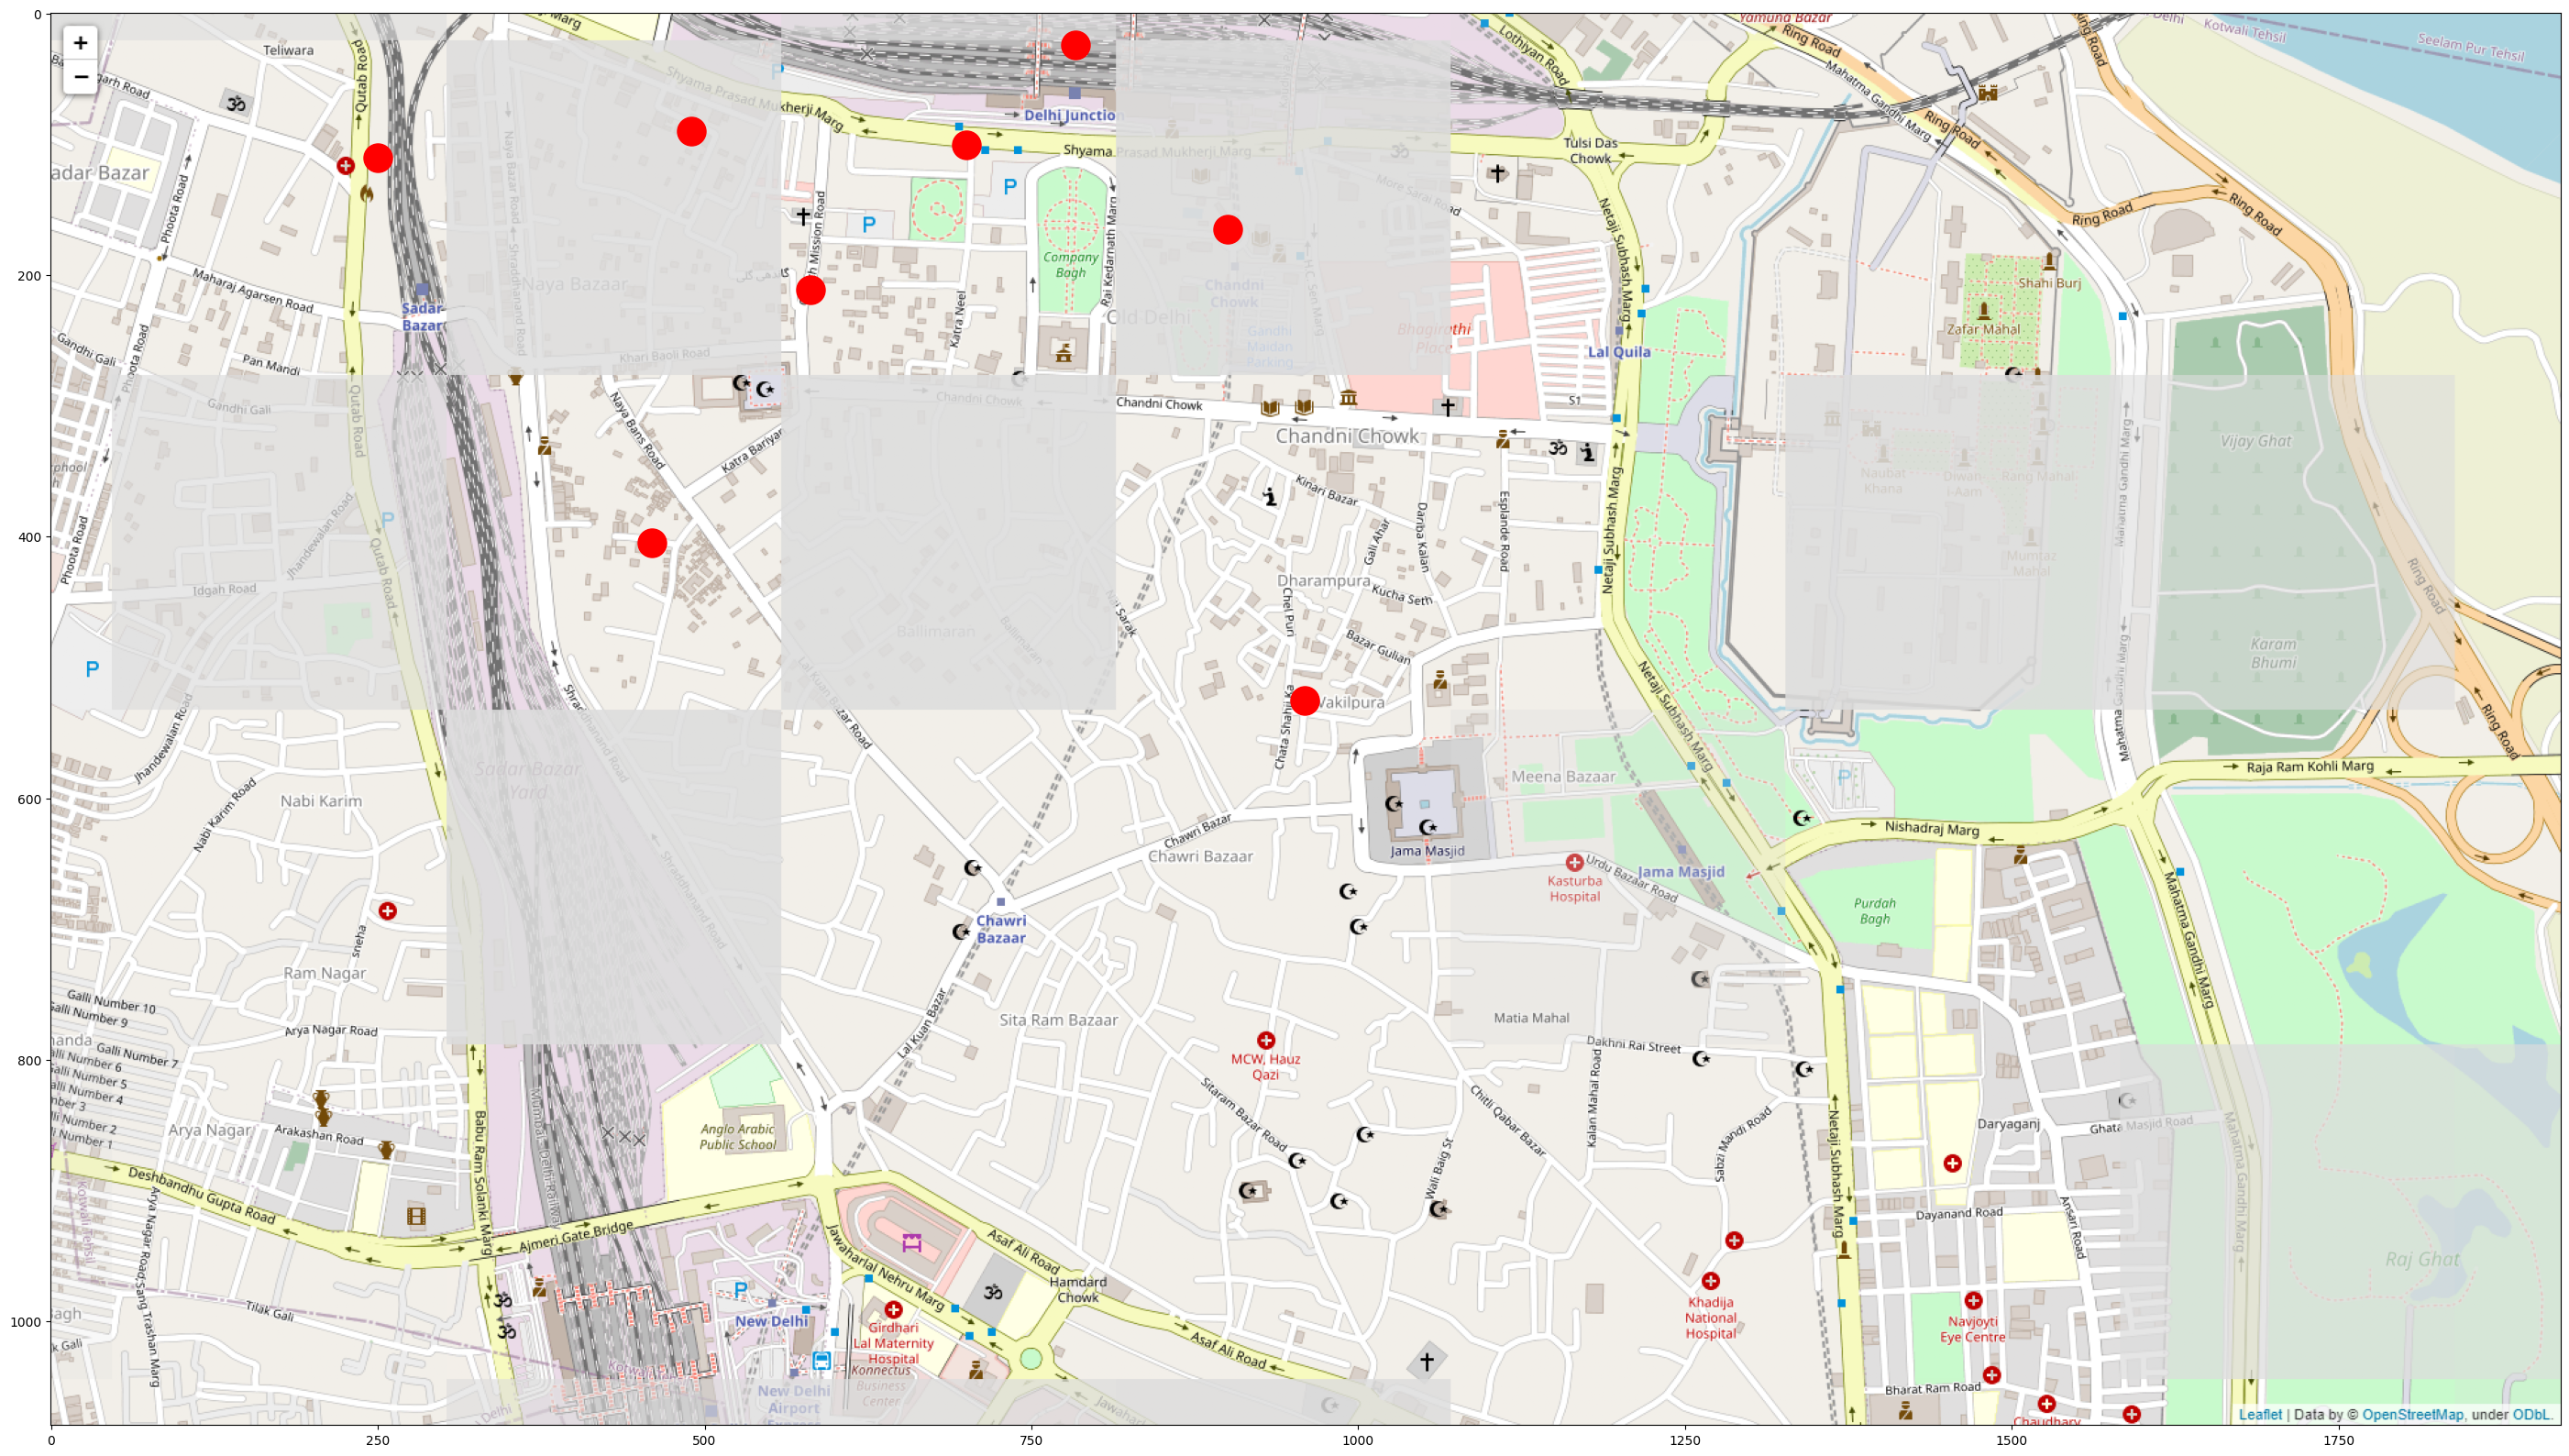

In [21]:
#Loading the png saved earlier
img=mpimg.imread('map.png')
plt.figure(figsize=(40,20))
imgplot = plt.imshow(img)
crimes = [(959, 525),(250,110), (460, 405), (581, 211), (490, 90),(700,100),(900,165),(784,24)]

for x, y in crimes:
    plt.scatter(x, y, s=500, c='red', marker='o')
plt.show()

# Rossmos Formula
![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/ace3b0799c2348656129a0180f4b5571fc005ec5)

![iamge](https://wikimedia.org/api/rest_v1/media/math/render/svg/12806adad484cedef74aa73f41c6809e6d806d60)

P i,j\ \ \ \ \ \ \ \ \ \ \ \ is the resultant probability for point ij;
k\ \ \ \ \ \ \ \ \ \ \ \ is an empirically determined constant;
B\ \ \ \ \ \ \ \ \ \ \ \ is the radius of the buffer zone;
C\ \ \ \ \ \ \ \ \ \ \ \ is the number of crime sites;
f\ \ \ \ \ \ \ \ \ \ \ \ is an empirically determined exponent;
g\ \ \ \ \ \ \ \ \ \ \ \ is an empirically determined exponent;
x i,y j\ \ \ \ \ \ \ \ \ \ \ \ are the coordinates of point ij of the resultant layer; and

In [22]:
def rossmo_formula(k: int, f: int, g: int, b: int, crimes:List[Tuple[int]], imax: int, jmax: int) -> Dict[str, Any]:
    output_map = np.zeros((imax, jmax), dtype=int)
    step = 1
    j = 0
    while j < jmax:
        i=0
        while i < imax:
            crimes_sum = 0
            for crime in crimes:
                distance = abs(j - crime[0]) + abs(i - crime[1])
                if distance > b:
                    crimes_sum += 1/math.pow(distance, f)
                else:
                    crimes_sum += math.pow(b, g-f)/math.pow(2*b - distance, g)
            pij = k * crimes_sum
            output_map[i][j] = pij
            i += step
        j += step
    return output_map

# Plotting the heat map of the serial killers most probable location

In [23]:
heat_map_data = rossmo_formula(k=110, f=0.08, g=0.01, b=250, imax=img.shape[0], jmax=img.shape[1], crimes=crimes)

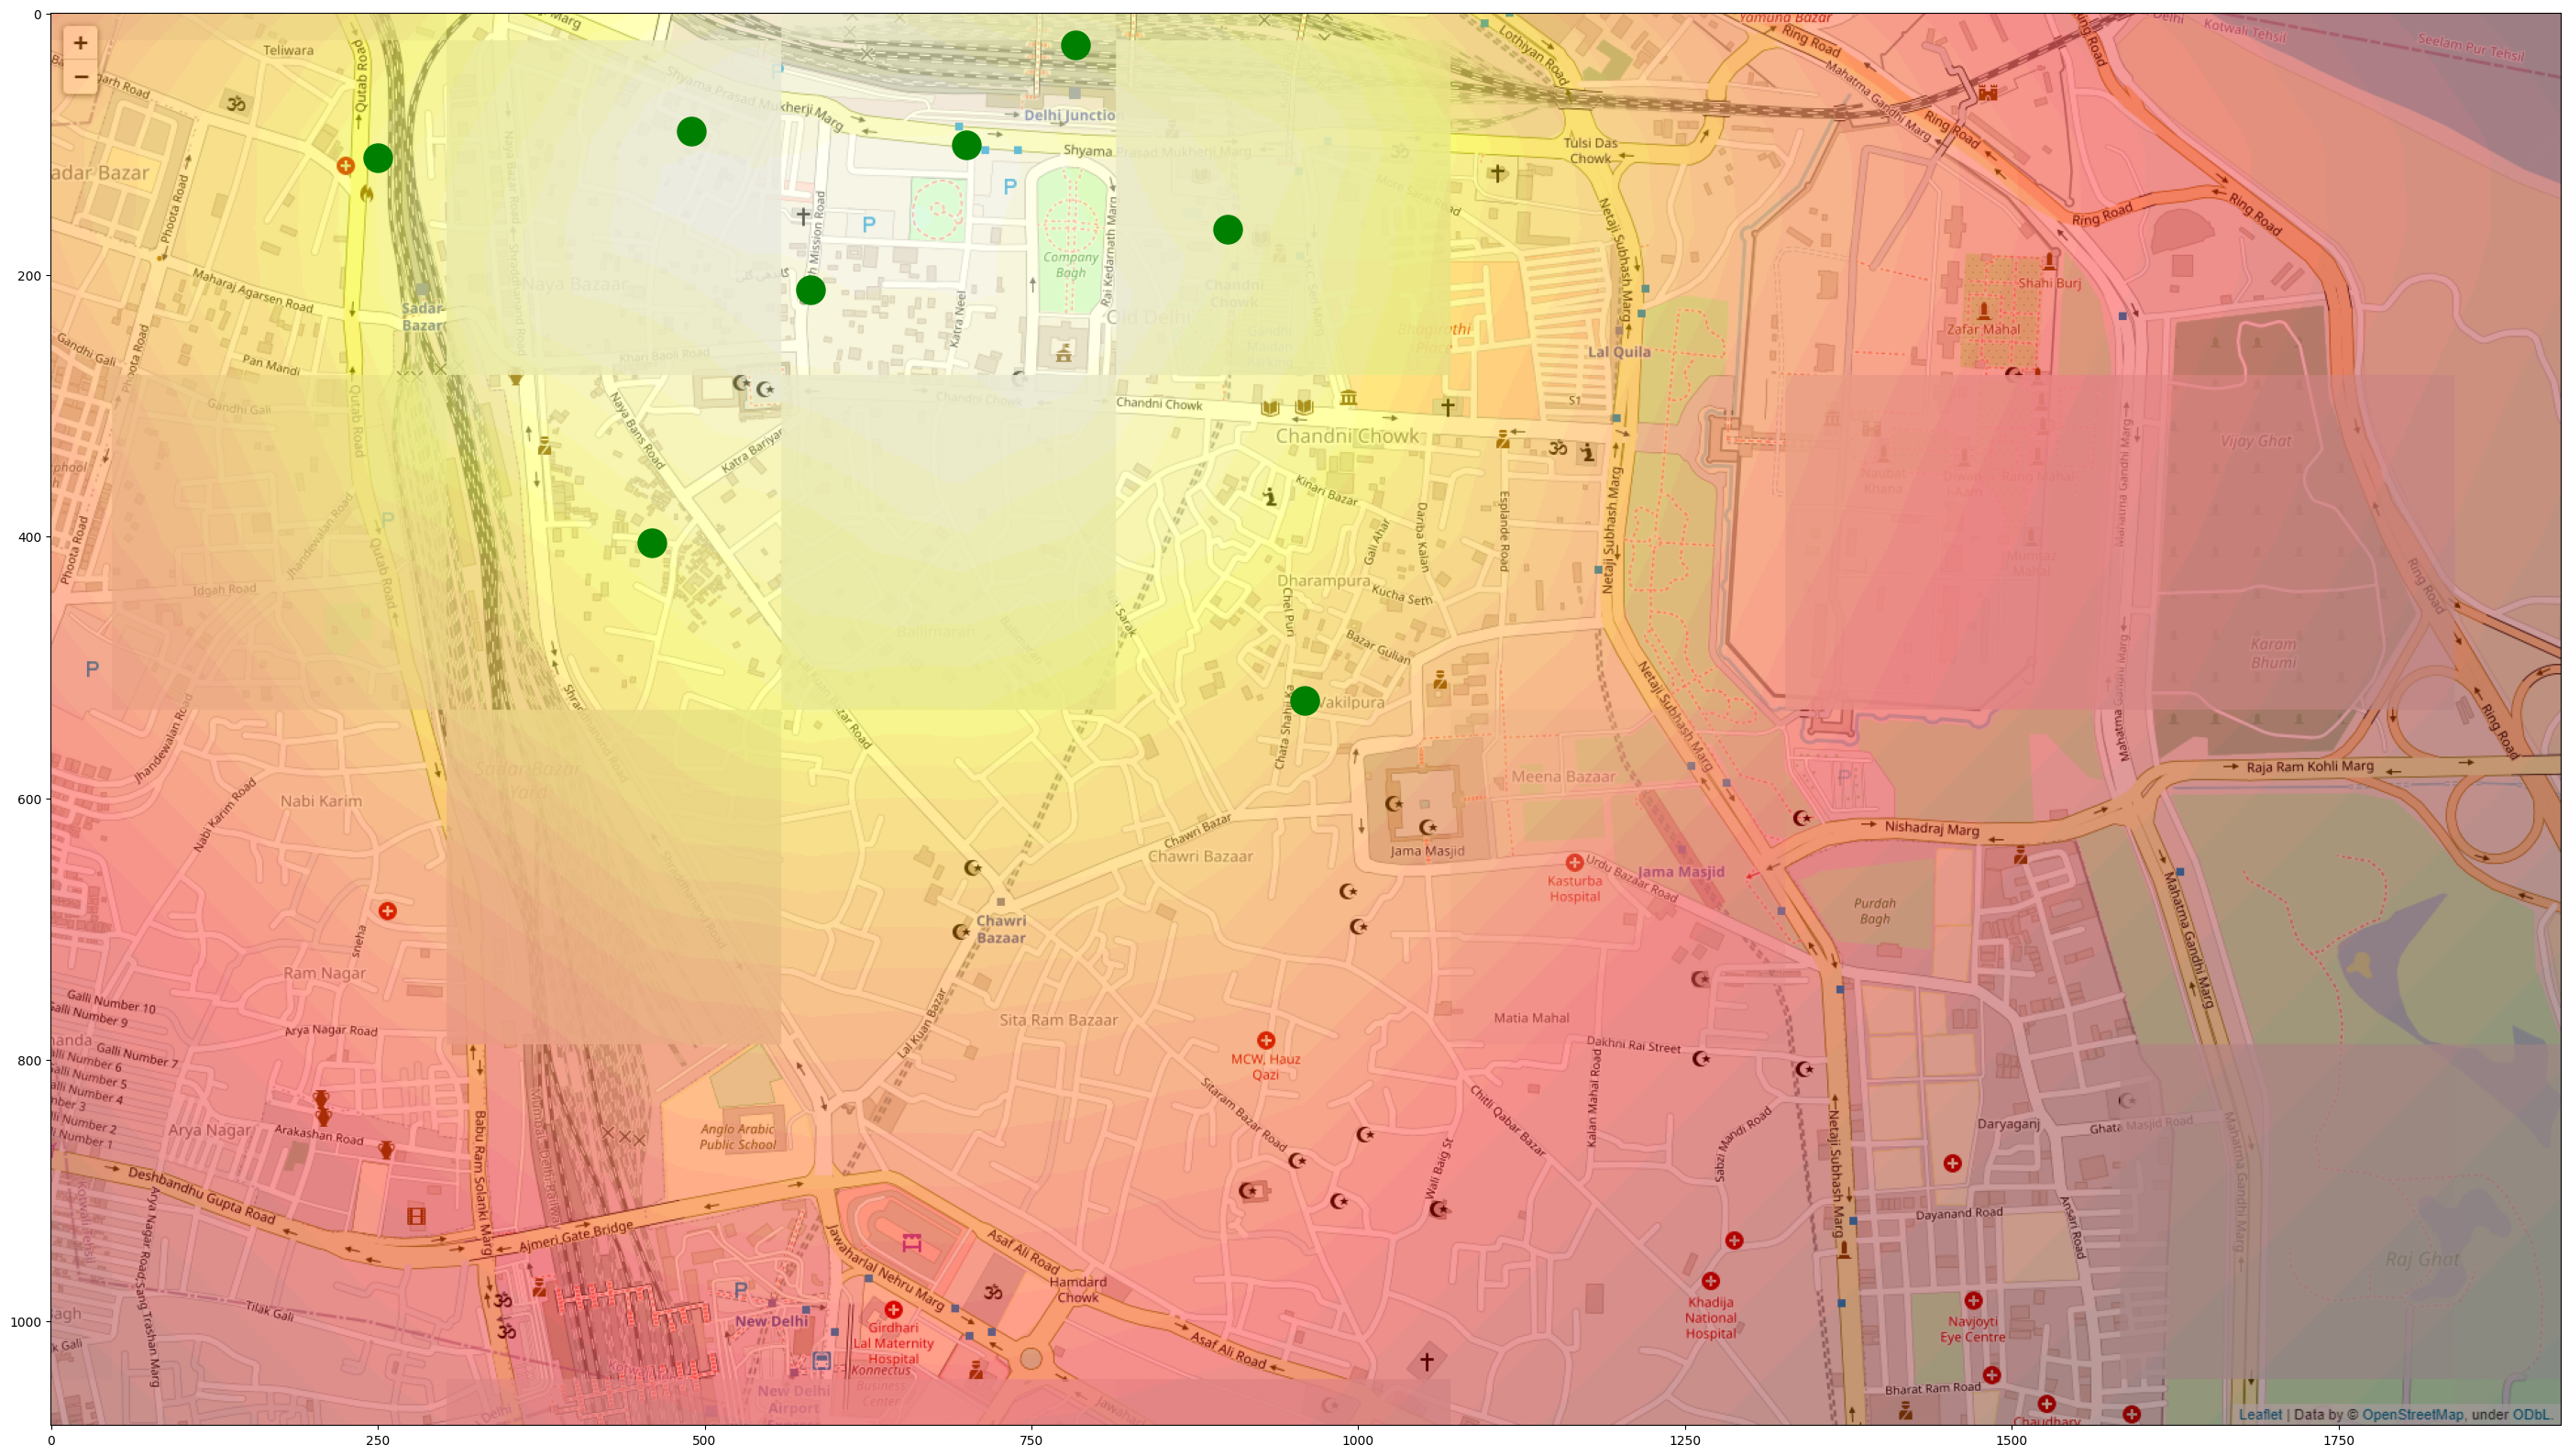

In [24]:
normalized = (heat_map_data * (255.0/heat_map_data.max())).astype(np.uint8)
plt.figure(figsize=(40,20))
plt.imshow(img)
plt.imshow(normalized, cmap='hot', interpolation='nearest', alpha=0.4)
for x, y in crimes:
    plt.scatter(x, y, s=500, c='green', marker='o')
plt.show()